# Linear Algebraic Background Subtraction For Femtosecond Timing

## Intro

This notebook demonstrates how to perform a linear algebraic based background subtraction for isolating the edge in femto second x-ray/laser timing recovery. (SVD of signals themselves are shown too.)

Based on "Singular value decomposition as a tool for background corrections in time-resolved XFEL scattering data", Kristoffer Haldrup,Philosophical Transactions of the Royal Society B: Biological Sciences, page 20130336
June 4, 2014

## Loading Libraries

In [1]:
from pylab import *
import h5py
from scipy.optimize import curve_fit
#from scipy.stats import binned_statistic_dd
from scipy.stats import binned_statistic_dd
import pickle
from scipy import stats
from scipy.stats.mstats import theilslopes
from scipy.signal import medfilt
from scipy.signal import savgol_filter
import os
import recalculating_attm_data_package as eig_back

## Initializing Data

### Loading Data

In [2]:
#load data
experiment_run_name = "xpptut15run420.h5"
my_file = experiment_run_name
my_hdf5_object = h5py.File(my_file,"r")

### Converting hdf5 to Python Dictionary

In [3]:
#convert hdf5 to dict
my_list = []
def func(name, obj):
    my_list.append(name)

my_hdf5_object.visititems(func)
my_dict = {}
for i in my_list:
    my_dict[i] = array(my_hdf5_object[i])
pixel_to_femtosecond_list = []
width_list = []

## Visualizing Some Sample Data

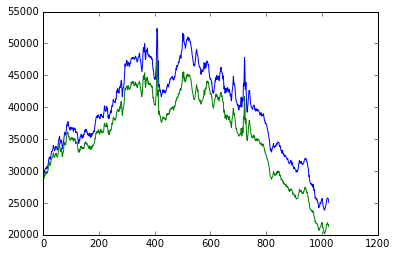

In [4]:
#plot some sample data
time_camera = 'timeToolOpal'
plot(my_dict[time_camera][0])
plot(my_dict[time_camera][3000])
show()

## Isolating and Displaying Some Sample Backgrounds

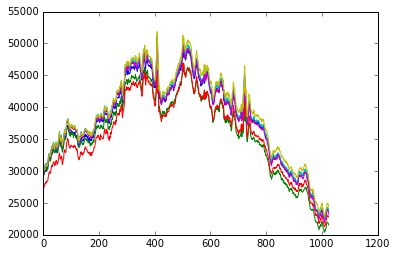

In [5]:
#identify background shots and plot some of them
my_dropped_shots = array(my_dict['evr/code_162']==1)              #this creates an array of booleans for dropped shots
atm_backgrounds = my_dict[time_camera][my_dropped_shots][::1]    #using the boolean array to select the dropped shots
plot(atm_backgrounds[30::400].transpose())
show()

In [6]:
atm_backgrounds.shape

(2145, 1024)

##  Eigen-Backgrounds

In [7]:
my_mask = my_dict[time_camera][0].astype(bool)
my_mask[0:500]=True
my_mask[500:900]=False
my_mask[900:]=True

In [8]:
my_dict[time_camera].shape

(15015, 1024)

In [9]:
background_subtracted = eig_back.subtract_background(my_dict[time_camera],
                                                     my_dropped_shots,
                                                     my_mask,
                                                     svd_size=15)
                            
                             

entering function
dropped shots selected
(2145, 1024)
transpose dot product
eigen values calculated


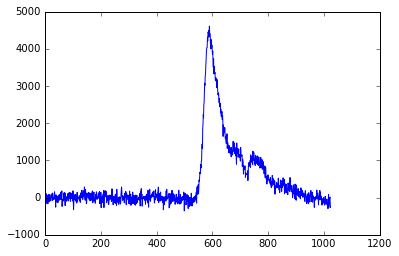

In [10]:
plt.plot(np.real(background_subtracted)[500])
plt.show()

In [11]:
pixel_positions,pixel_position_cov = eig_back.get_edge_position(background_subtracted,savgol_win_size = 21,fit_range=4)

Progress: [####################] 100.0%


In [12]:
pixel_positions

array([ 247.69687868,  521.27232017,  577.69360753, ...,  584.88385261,
        532.57507623,  614.74780114])

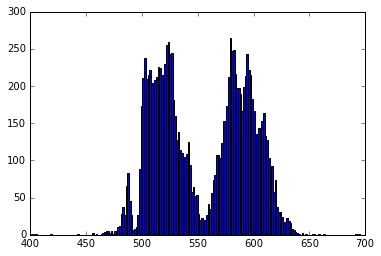

In [13]:
my_hist = plt.hist(pixel_positions[my_dropped_shots==0],bins=np.arange(400,700,1.5))
plt.show()